In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
data=pd.read_csv('Passanger_booking_data.csv')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [4]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [5]:
#Checking the data shape
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns')

data.shape

The dataset contains 50002 rows and 14 columns


(50002, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
# Stastic about dataset
# data.describe().style.background_gradient(cmap='bone_r')
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
# Checking the null values 
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [9]:
# Checking the dublicate values in the data
# dublicate_values=data.duplicated().sum()
# print(f'The data contains {dublicate_values} dublicate_values')
data.duplicated().sum()

719

In [10]:
# drop the dublicate values
data=data.drop_duplicates()
data.shape

(49283, 14)

**** EDA Report****

In [11]:
# from ydata_profiling import ProfileReport

# data = pd.read_csv("Passanger_booking_data.csv")

# prof = ProfileReport(data, title='EDA Report of Airline Passanger Booking Data',explorative=True)

# prof.to_file('EDA_report.html')

 ****About DataSet****

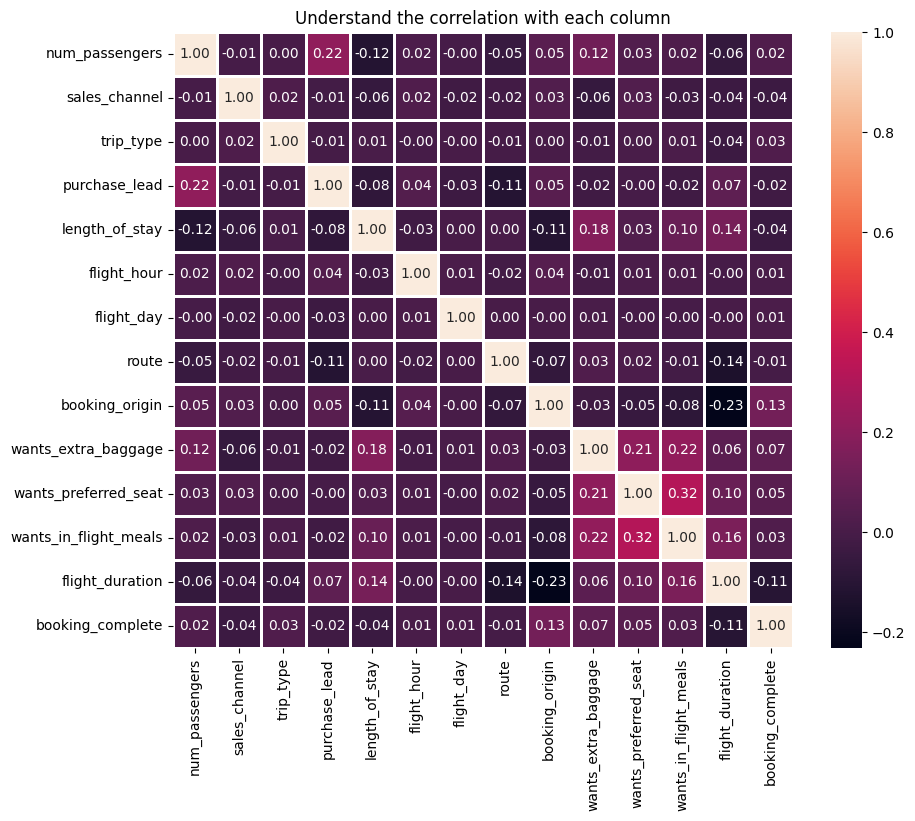

In [59]:
# Corelation of Dataset
data_types = data.dtypes

non_numeric_columns = data.select_dtypes(exclude=['number'])

# Convert non-numeric columns to numeric using one-hot encoding
data_numeric = pd.get_dummies(data, columns=non_numeric_columns.columns)

# Calculate and visualize the correlation for the entire dataset
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f',annot_kws=None, linewidths=1)
plt.title("Understand the correlation with each column")
plt.show()

**Explore Data Analysis**

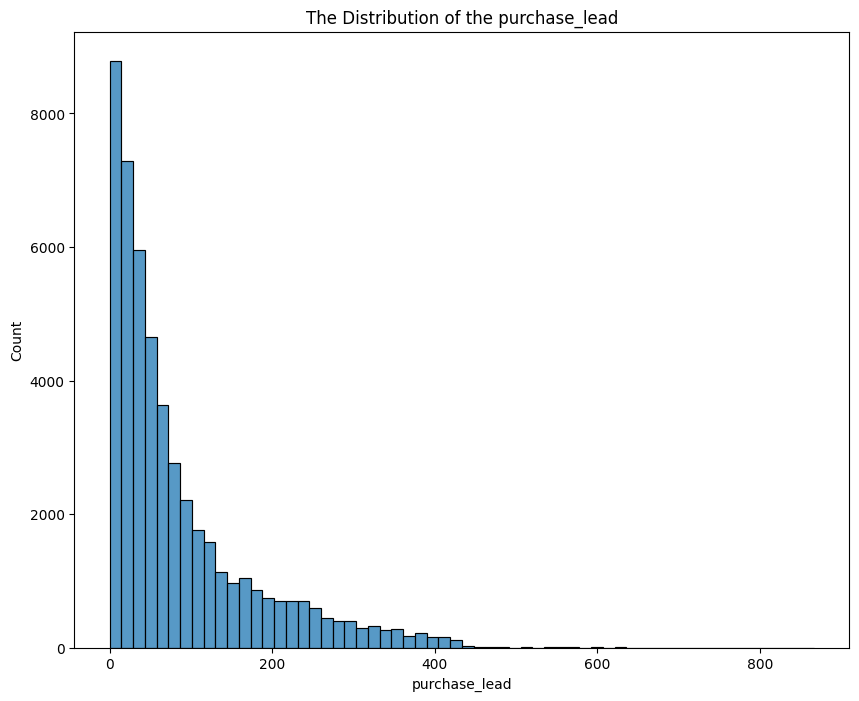

In [15]:
# Distribution of the num of passengers in the data
plt.figure(figsize=(10,8))
sns.histplot(data['purchase_lead'],bins = 60 )
plt.title("The Distribution of the purchase_lead") 
plt.show()

Text(0, 0.5, 'Count of values')

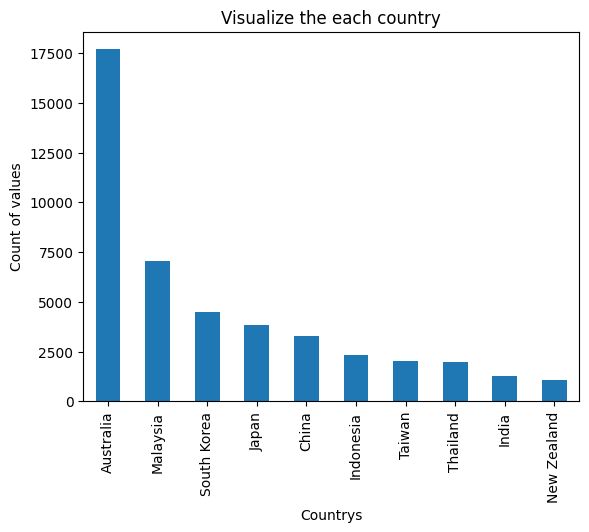

In [17]:
# Create a bar plot visualize the top 10 most demanding origin 
data ['booking_origin'].value_counts().sort_values(ascending = False).nlargest(10).plot(kind='bar')
plt.title("Visualize the each country") 
plt.xlabel("Countrys")
plt.xticks(rotation=90)
plt.ylabel("Count of values")

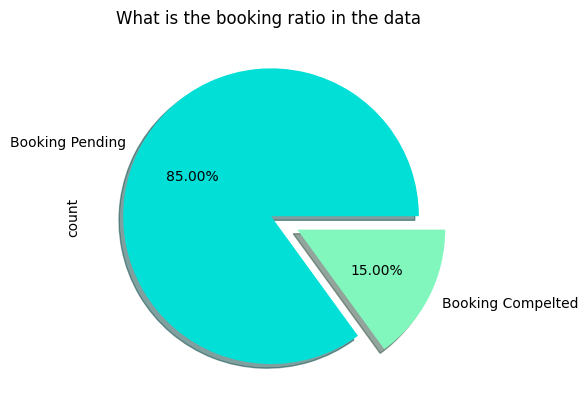

In [18]:
# Using the pie chart understand the how much precentage is complete there bookings
data ['booking_complete'].value_counts().plot(kind = 'pie',explode = [ 0,0.2 ],labels = ['Booking Pending',"Booking Compelted"],colors = ['#01DFD7','#81F7BE'],autopct ='%1.2f%%',shadow = True)                                                       
plt.title("What is the booking ratio in the data ") 
plt.show ()                                                        

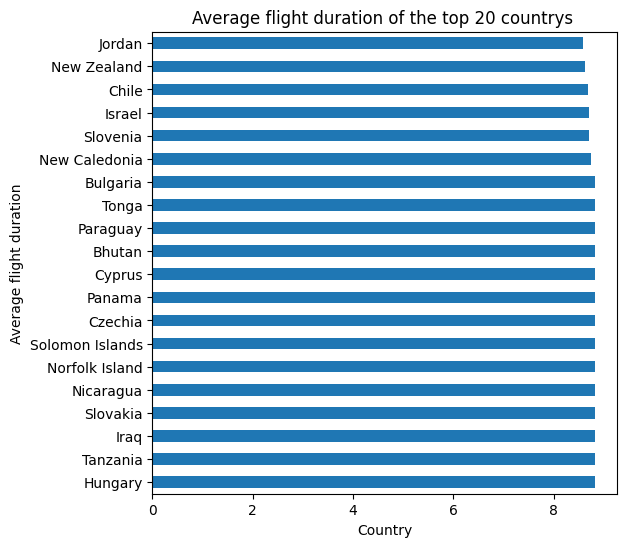

In [19]:
# Find the average flight duration of the top 20 destination in the bar charts
data.groupby('booking_origin')['flight_duration'].mean().sort_values(ascending=False).nlargest(20).plot(kind='barh',figsize=(6,6))
plt.title("Average flight duration of the top 20 countrys ")
plt.xlabel("Country")
plt.ylabel("Average flight duration")
plt.show()



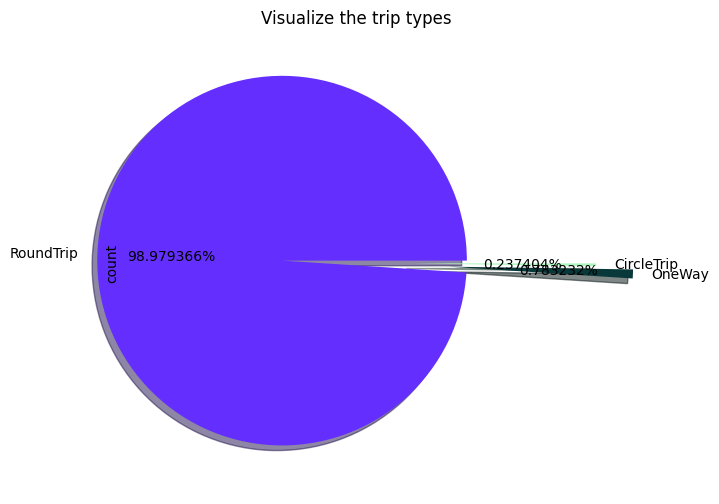

In [20]:
# How much percentage people intrested in the trip types 
trip_type = ['trip_type']
for i,col in enumerate(trip_type ): 
    plt.figure(figsize = (10,6))
    data[col].value_counts().plot(kind='pie',explode=[0.4,0.5,0.3],labels = [ 'RoundTrip',"OneWay",'CircleTrip'],colors = [ '#642EFE','#083839','#A9F5BC'] , autopct = '%1.6f%%',shadow = True )
    plt.title("Visualize the trip types")
    plt.show()


<Figure size 1000x500 with 0 Axes>

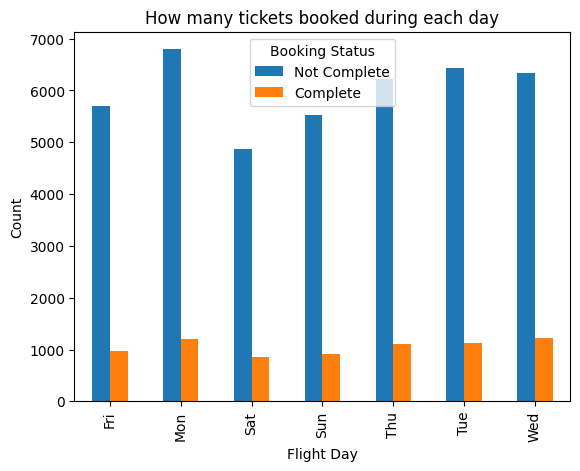

In [22]:
# Group the data by 'flight_day' and 'booking_complete', and count the occurrences
counts = data.groupby(['flight_day', 'booking_complete']).size().unstack()

# Plot a stacked bar chart
plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("How many tickets booked during each day")
plt.xlabel("Flight Day")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=['Not Complete', 'Complete'])
plt.show()

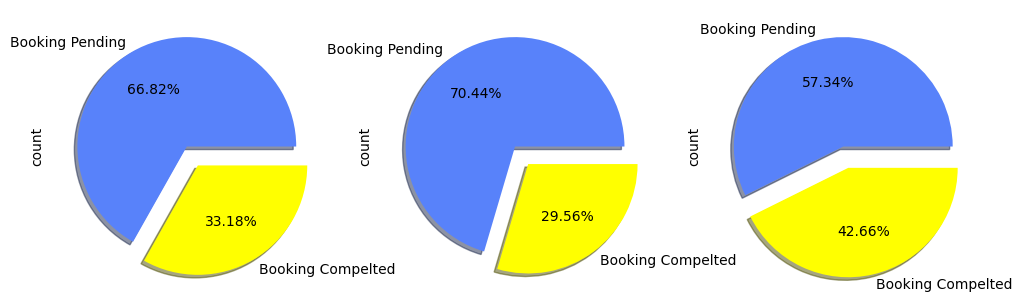

In [23]:
# Create a data frame for the extra
df=['wants_extra_baggage','wants_preferred_seat' , 'wants_in_flight_meals']
plt.figure(figsize = (12,5))
for i,col in enumerate(df): 
    plt.subplot(1,3,i+1)
    data[col].value_counts().plot(kind='pie',explode=[0,0.2],
                                 labels=['Booking Pending',"Booking Compelted"],
                                 colors=['#5882FA' , '#FFFF00'],
                                 autopct='%1.2f%%',
                                 shadow=True)
    

Text(0.5, 1.0, 'Find the how much percentage of booking completed through the channel')

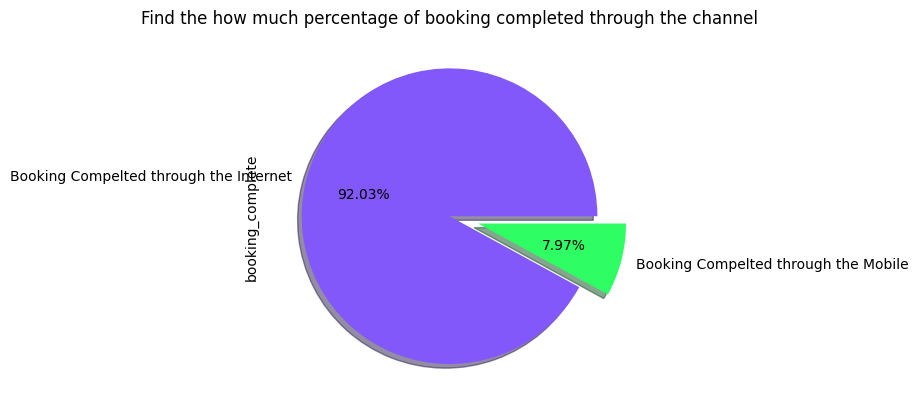

In [24]:
# Let's Compare How much percentage of the booking complete through mobile and internet
data.groupby('sales_channel') ['booking_complete'].sum ().plot( kind = 'pie',
                                                               explode=[0,0.2],
                                                               labels=['Booking Compelted through the Internet',"Booking Compelted through the Mobile"],
                                                               colors = [ '#8258FA','#2EFE64'],
                                                               autopct='%1.2f%%',
                                                               shadow=True)
plt.title("Find the how much percentage of booking completed through the channel") 
                                                               

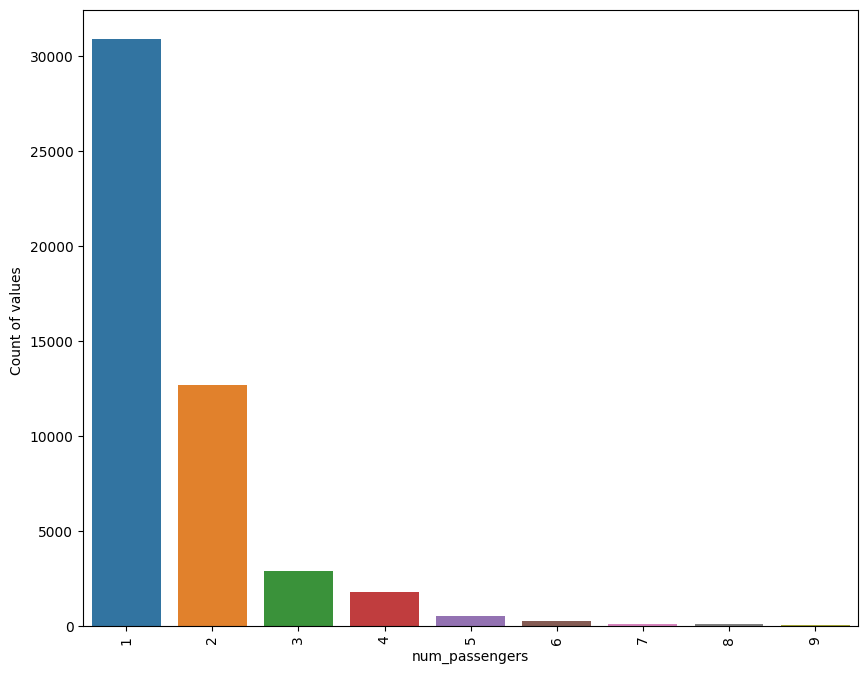

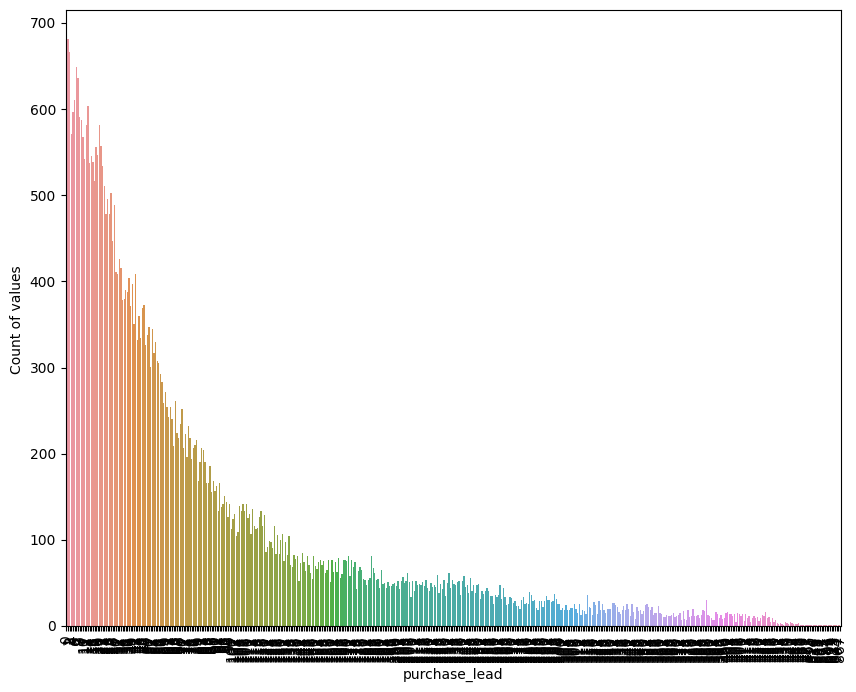

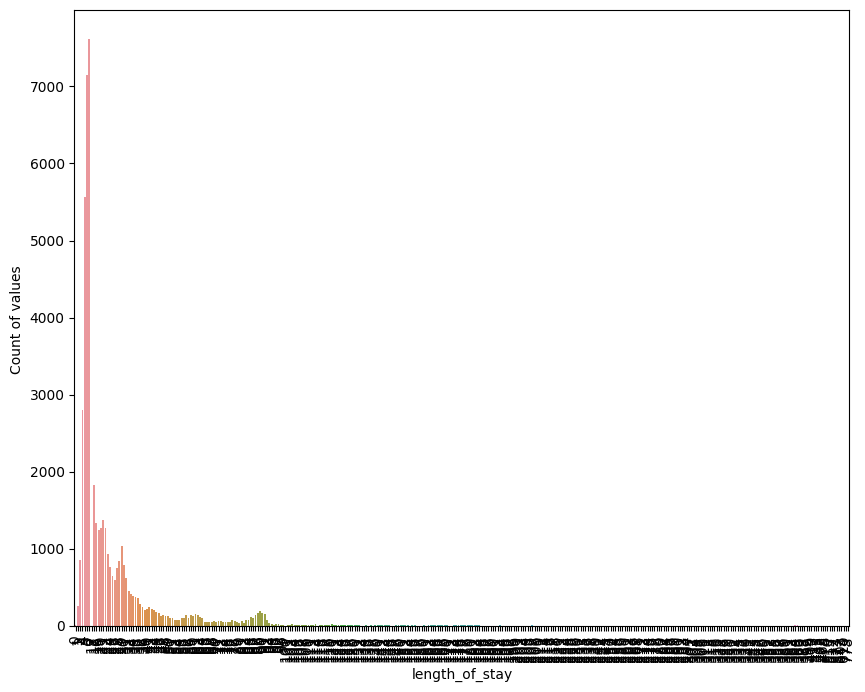

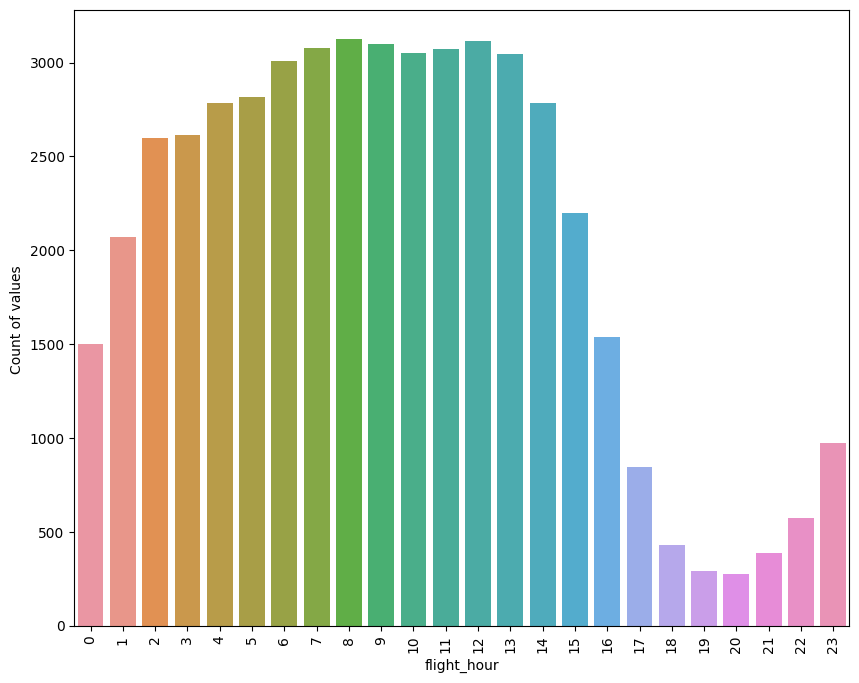

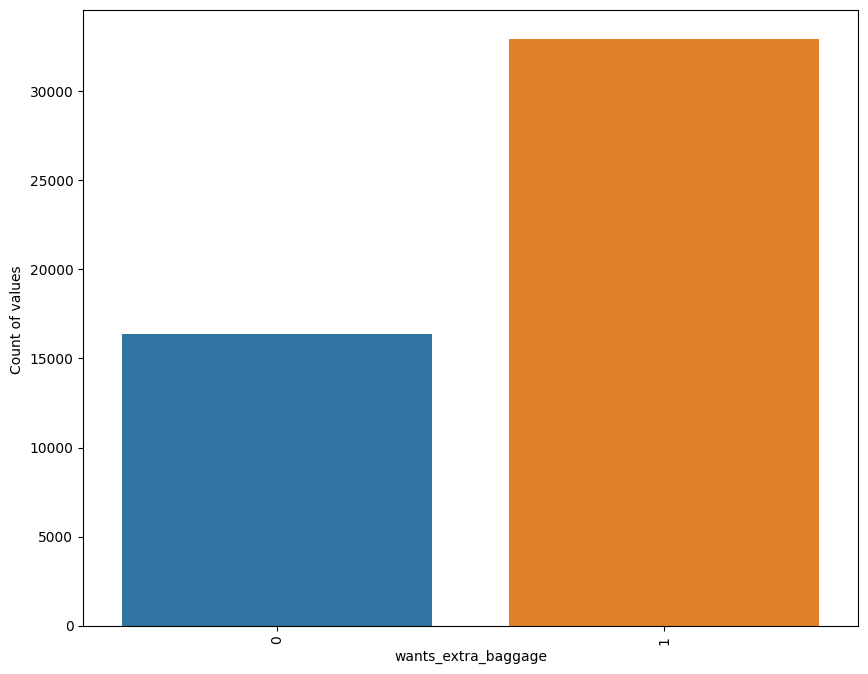

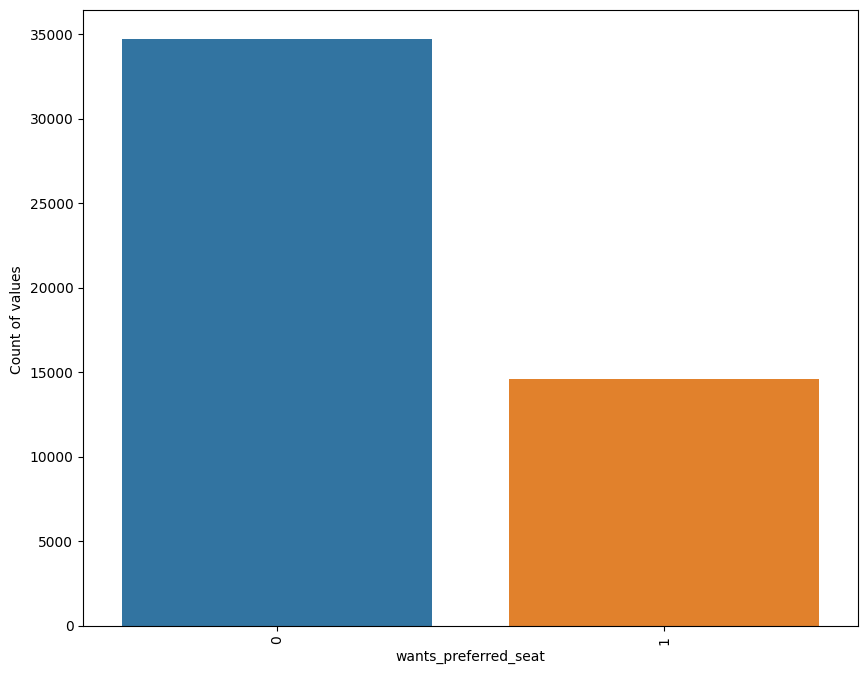

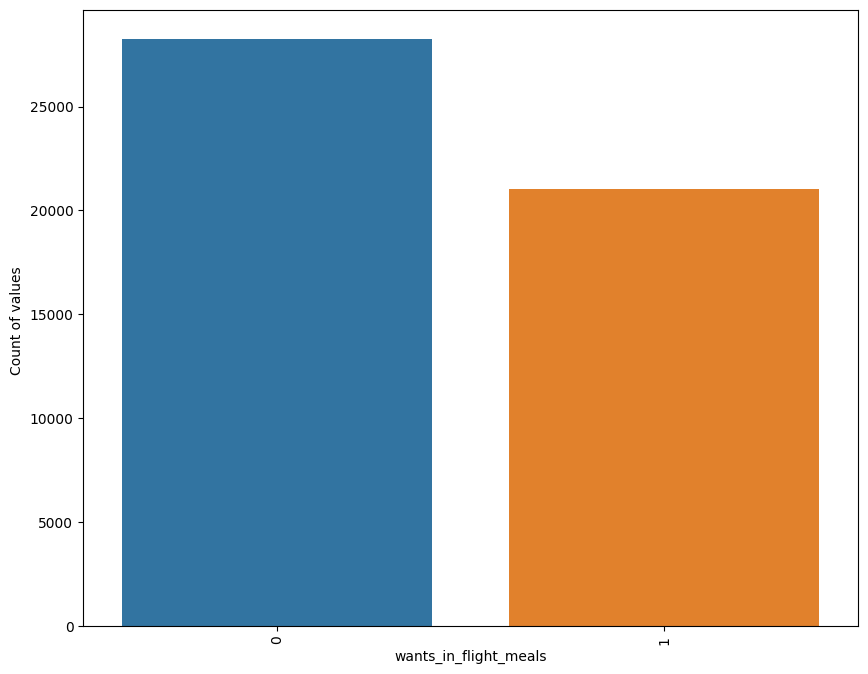

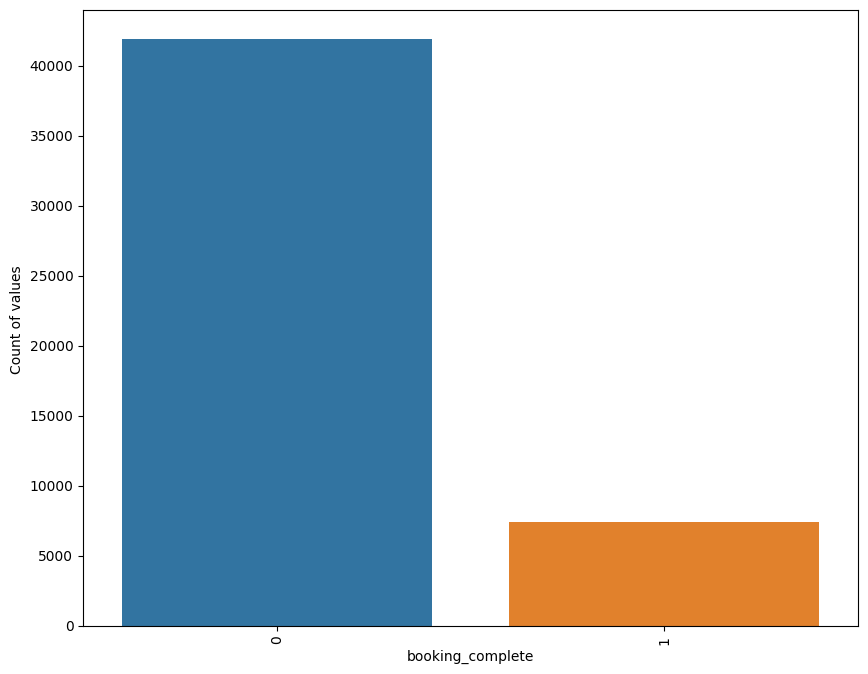

In [25]:
# Create a countplot to understand the each columns values in the data
for i in data.select_dtypes (include = 'int'):
    plt.figure(figsize = (10,8))
    sns.countplot(data = data ,x= data [i])
    plt.xlabel (f'{i}')
    plt.ylabel('Count of values ') 
    plt.xticks (rotation = 90) 
    plt.show()
    

In [26]:
# Using the pivot table find the each origin and day most ticket are booked
pd.pivot_table(data,index='booking_origin',columns='flight_day',values='booking_complete').style.background_gradient(cmap='plasma')

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
booking_origin,,,,,,,
(not set),0.272727,0.000000,1.000000,0.166667,0.076923,0.076923,0.428571
Afghanistan,nan,nan,nan,nan,0.000000,nan,nan
Algeria,nan,nan,nan,nan,0.000000,nan,nan
Argentina,nan,0.000000,nan,nan,0.000000,0.000000,0.000000
Australia,0.043275,0.050264,0.053197,0.049311,0.054953,0.050225,0.052612
Austria,0.000000,0.000000,nan,0.000000,0.000000,nan,0.000000
Bahrain,nan,nan,0.500000,nan,0.666667,nan,nan
Bangladesh,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000
Belarus,0.000000,nan,nan,nan,nan,nan,nan


**Machine Learning Modeling**

In [27]:
# Import the all required Libraries for machine Learning modeling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

In [28]:
# Covert the categorical data into the numerical using the Labelencoder
for col in data.select_dtypes ( include ='object').columns:
    label_encoder = LabelEncoder() 
    label_encoder.fit(data[col].unique ()) 
    data[col]=label_encoder.transform(data[col])
    

In [37]:
# Divided the data into independent and dependent variables
X = data.drop(['booking_complete','purchase_lead','route'],axis = 1)
y = data['booking_complete']
# Scalling the data 
scaler=StandardScaler() 
X = scaler.fit_transform(x)
# Split the data into train and test data
X_train , X_test , y_train , y_test = train_test_split(X ,y,test_size = 0.20 ,random_state = 120 )

In [42]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

In [43]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)

In [44]:
# Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_pred)

In [45]:
# K-Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [46]:
# Print results
print(f'Logistic Regression Accuracy: {logistic_accuracy * 100:.2f}')
print(f'Decision Tree Accuracy: {tree_accuracy * 100:.2f}')
print(f'Random Forest Accuracy: {forest_accuracy * 100:.2f}')
print(f'K-Neighbors Accuracy: {knn_accuracy * 100:.2f}')

Logistic Regression Accuracy: 84.95
Decision Tree Accuracy: 76.85
Random Forest Accuracy: 83.83
K-Neighbors Accuracy: 83.45


In [47]:
# Create an accuracy comparison chart
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Neighbors']
accuracy_scores = [logistic_accuracy, tree_accuracy, forest_accuracy, knn_accuracy]

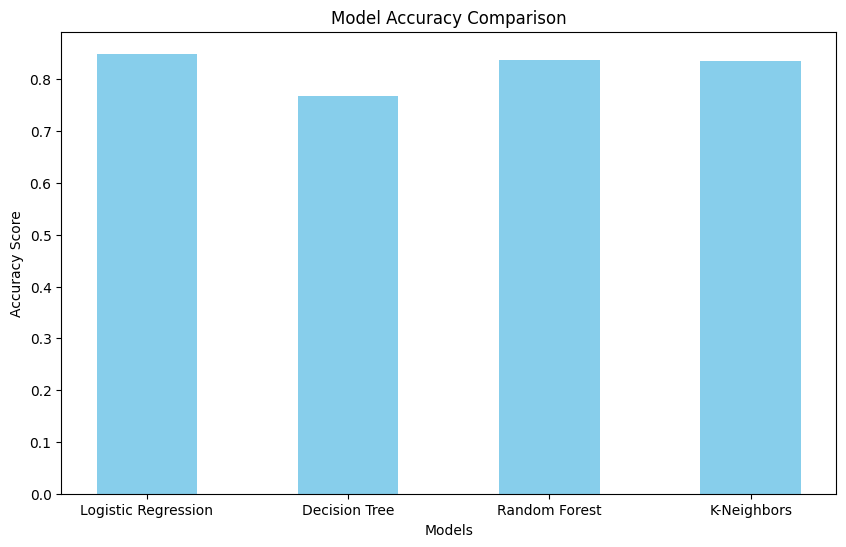

In [57]:

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue',width=0.5)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()